# Proyek Akhir:Understanding-and-Predicting-Employee-Turnover-at-Jaya-Jaya-Maju

- Nama: **Wildan Fadhil Nazaruddin**
- Email: **wildanfadhil76@gmail.com**
- Id Dicoding:

### Persiapan

## Menyiapkan library yang dibutuhkan

In [83]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Menyiapkan data yang akan diguankan

In [155]:
df = pd.read_csv('employee_data.csv')

## Data Understanding

#### Ringkasan Dataset

##### Melihat 5 baris teratas dari dataset

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [43]:
# melihat nilai null di kolom attrition
df['Attrition'].isnull().sum()

np.int64(412)

- terdapat nilai yang kosong di kolom atrion sebanyak 412

In [21]:
# statistics desribe
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
# Melihat nilai dari kolom atrion 
# nilai 1 = attrition, nilai 0 = tidak attrition
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [23]:
# menghitung nilai unik dari business travel
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [24]:
# mellihat nilai unik dari department
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [25]:
# melihat nilai unik dari education field
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [ ]:
# melihat nilai unik dari education 
# nilai 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [ ]:
# melihat nilai unik dari environment satisfaction
# nilai 1-Low, 2-Medium, 3-High, 4-Very High
df['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [31]:
# melihat nilai unik dari gender
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [32]:
# melihat nilai unik dari JobInvolvement
# nilai 1-Low, 2-Medium, 3-High, 4-Very High
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [33]:
# melihat nilai unik dari JobLevel
# nilai 1-1st Line, 2-2nd Line, 3-3rd Line, 4-4th Line, 5-5th Line
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [34]:
# melihat nilai unik dari Jobrole
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [35]:
# melihat nilai unik dari JobSatisfaction
# nilai 1-Low, 2-Medium, 3-High, 4-Very High
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [36]:
# melihat nilai unik dari MaritalStatus
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [37]:
# melihat nilai unik dari NumCompaniesWorked
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [38]:
# melihat nilai unik dari OverTime
df['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [39]:
# melihat nilai unik dari PerformanceRating
# 1-Low, 2-Good, 3-Excellent, 4-Outstanding
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [40]:
# melihat nilai unik dari RelationshipSatisfaction 
#  1-Low, 2-Medium, 3-High, 4-Very High
df['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [ ]:
# melihat nilai unik dari WorkLifeBalance
# 1-Low, 2-Good, 3-Excellent, 4-Outstanding
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

##### Statistik deskriptif:

- **Usia Karyawan (Age):**  
  Rata-rata usia karyawan adalah **36 tahun**, dengan rentang usia dari **18 hingga 60 tahun**. Hal ini menunjukkan bahwa mayoritas karyawan berada dalam rentang usia yang relatif muda dan berada di usia produktif.

- **Daily Rate:**  
  Rata-rata daily rate (rate harian) karyawan adalah **$802.49** dengan nilai tertinggi mencapai **$1499**. Hal ini mengindikasikan variasi besar dalam tingkat penghasilan per hari antar karyawan.

- **Jarak dari Rumah ke Kantor (DistanceFromHome):**  
  Jarak rata-rata dari rumah ke kantor adalah **9.19 km**. Mayoritas karyawan tinggal dalam jarak yang relatif dekat dari lokasi kerja mereka, namun terdapat variasi yang cukup besar.

- **Pendidikan (Education):**  
  Sebagian besar karyawan memiliki gelar sarjana (Education = 3) dengan jumlah terbanyak mencapai **572 orang**. Ini menunjukkan bahwa tingkat pendidikan karyawan di perusahaan ini cukup tinggi.

- **Kepuasan Lingkungan Kerja (EnvironmentSatisfaction):**  
  Kepuasan lingkungan kerja sebagian besar berada pada level **3 dan 4** (High dan Very High), dengan total mencapai **899 orang**. Hal ini mengindikasikan bahwa banyak karyawan merasa nyaman dengan lingkungan kerjanya.

- **Hourly Rate (Gaji per Jam):**  
  Rata-rata hourly rate karyawan adalah **$65.89**, dengan nilai minimum **$30** dan maksimum **$100**. Ini menunjukkan bahwa ada variasi yang signifikan dalam penghasilan per jam.

- **Job Involvement (Keterlibatan Kerja):**  
  Sebagian besar karyawan berada pada level **3 (high)**, yaitu sebanyak **868 orang**. Ini menunjukkan bahwa mayoritas karyawan cukup terlibat dalam pekerjaan mereka.

- **Job Level:**  
  Karyawan mayoritas berada pada JobLevel **1 dan 2** (543 dan 534 orang), yang berarti mereka berada di level awal dan menengah. Hanya sebagian kecil yang berada di level **4 dan 5**.

- **Job Satisfaction (Kepuasan Kerja):**  
  Kepuasan kerja sebagian besar berada pada level **4 dan 3** (Very High dan High), dengan total **901 orang**. Ini menunjukkan bahwa kebanyakan karyawan cukup puas dengan pekerjaan mereka.

- **Monthly Income (Pendapatan Bulanan):**  
  Rata-rata monthly income adalah **$6,502.93**, dengan rentang antara **$1,009 hingga $19,999**. Terdapat variasi yang cukup besar dalam hal pendapatan bulanan karyawan.

- **Monthly Rate (Tarif Bulanan):**  
  Rata-rata monthly rate adalah **$14,313.10**. Ini mencerminkan total pembayaran yang diterima oleh karyawan setiap bulan berdasarkan gaji dan komponen lainnya.

- **Num Companies Worked (Jumlah Perusahaan yang Pernah Dikerjakan):**  
  Karyawan sebagian besar pernah bekerja di **1 perusahaan** sebelumnya, diikuti oleh beberapa karyawan yang memiliki riwayat kerja di banyak perusahaan.

- **Percent Salary Hike (Kenaikan Gaji):**  
  Rata-rata kenaikan gaji karyawan adalah **15%**. Hal ini memberikan gambaran bahwa rata-rata kenaikan gaji tahunan karyawan perusahaan ini berada pada kisaran standar industri.

- **Performance Rating (Penilaian Kinerja):**  
  Mayoritas karyawan (sekitar **84.6%**) berada pada level **3** dalam penilaian kinerja mereka, dengan **226 karyawan** memperoleh rating tertinggi yaitu level **4**. Hal ini menunjukkan sebagian besar karyawan dinilai dengan kinerja yang baik, namun hanya sebagian kecil yang dianggap sangat luar biasa.

- **Relationship Satisfaction (Kepuasan Hubungan Kerja):**  
  Kepuasan hubungan kerja mayoritas karyawan berada pada level **3 dan 4** (High dan Very High), yang mencerminkan hubungan interpersonal yang sehat di tempat kerja.

- **Standard Hours (Jam Kerja Standar):**  
  Sebagian besar karyawan bekerja **80 jam** dalam seminggu, menunjukkan bahwa perusahaan menetapkan jam kerja standar yang konsisten.

- **Stock Option Level (Level Opsi Saham):**  
  Sebagian besar karyawan tidak memiliki opsi saham (Level **0**), dengan hanya sedikit karyawan yang memiliki level lebih tinggi.

- **Total Working Years (Jumlah Tahun Bekerja):**  
  Rata-rata jumlah tahun bekerja karyawan adalah **11 tahun**, dengan rentang antara **0 hingga 40 tahun**. Beberapa karyawan baru, namun mayoritas memiliki pengalaman yang cukup lama di dunia kerja.

- **Training Times Last Year (Jumlah Pelatihan Tahun Lalu):**  
  Sebagian besar karyawan mengikuti **2 hingga 3 kali pelatihan** pada tahun lalu. Hal ini mencerminkan adanya fokus pada pengembangan profesional karyawan.

- **Work-Life Balance (Keseimbangan Kerja dan Kehidupan):**  
  Mayoritas karyawan berada pada level **3 (Excellent)** dalam keseimbangan kehidupan kerja mereka, yang menunjukkan bahwa perusahaan mendukung keseimbangan yang baik antara pekerjaan dan kehidupan pribadi.

- **Years At Company (Tahun Bekerja di Perusahaan):**  
  Rata-rata tahun bekerja di perusahaan adalah **7 tahun**, dengan rentang dari **0 hingga 40 tahun**. Ini menunjukkan bahwa sebagian besar karyawan tetap bekerja cukup lama di perusahaan.

- **Years In Current Role (Tahun dalam Posisi Saat Ini):**  
  Rata-rata tahun di posisi saat ini adalah **4 tahun**, dengan rentang dari **0 hingga 18 tahun**. Karyawan relatif stabil dalam peran mereka.

- **Years Since Last Promotion (Tahun Sejak Promosi Terakhir):**  
  Sebagian besar karyawan (sekitar **581 orang**) belum mendapatkan promosi sejak mereka bergabung dengan perusahaan. Ini mungkin menunjukkan masalah dalam mobilitas karir atau kesempatan promosi.

- **Years With Current Manager (Tahun dengan Manajer Saat Ini):**  
  Mayoritas karyawan (**344 orang**) telah bekerja dengan manajer yang sama selama **2 tahun**, menunjukkan adanya tingkat retensi manajer yang stabil.

- **Status Perkawinan (Marital Status):**  
  Sebagian besar karyawan berstatus menikah (**673 orang**), diikuti oleh yang belum menikah (**470 orang**) dan yang bercerai (**327 orang**).

- **OverTime (Lembur):**  
  Hanya sekitar **416 karyawan** yang bekerja lembur, yang menunjukkan bahwa sebagian besar karyawan tidak bekerja di luar jam kantor.

- **Jenis Kelamin (Gender):**  
  **60%** karyawan adalah laki-laki, sementara **40%** adalah perempuan. Distribusi gender ini menunjukkan keberagaman yang cukup seimbang di perusahaan.

- **Business Travel (Perjalanan Bisnis):**  
  Mayoritas karyawan (**1043 orang**) bekerja dalam kategori **Travel-Rarely**. Hanya sebagian kecil yang melakukan perjalanan bisnis sering (**Travel_Frequently**) atau tidak sama sekali (**Non-Travel**).

- **Attrition (Pergantian Karyawan):**  
  Terdapat **179 karyawan** yang mengalami attrition, sementara **879 karyawan** tidak mengalami attrition, dan **412 karyawan** tidak terdata.


## EDA

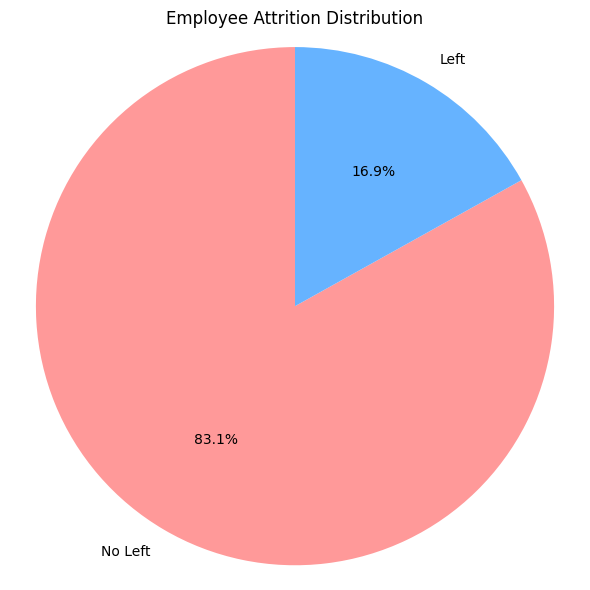

In [48]:
# Membuat label attrition
df['Attrition_Label'] = df['Attrition'].map({1.0: 'Left', 0.0: 'No Left'})

# Hitung jumlah tiap kategori
attrition_counts = df['Attrition_Label'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
colors = ['#ff9999','#66b3ff']  # Warna untuk Left dan No Left
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Employee Attrition Distribution')
plt.axis('equal')  # Supaya bentuknya bulat
plt.tight_layout()
plt.show()


- Insight :
 sebanyak 16% yang keluar dari 83% yang bertahan

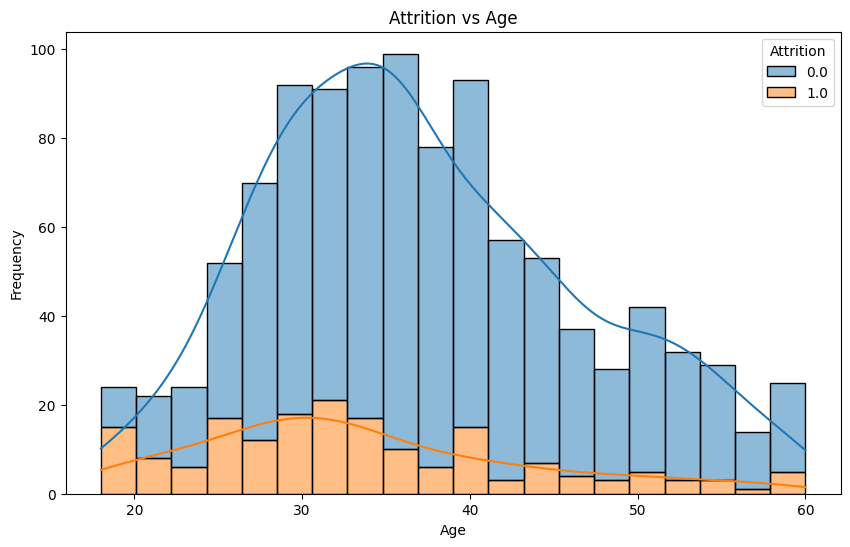

In [53]:
# Attrition vs Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', kde=True,bins=20)
plt.title('Attrition vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- atrion pada umur 30-40 sangat tinggi

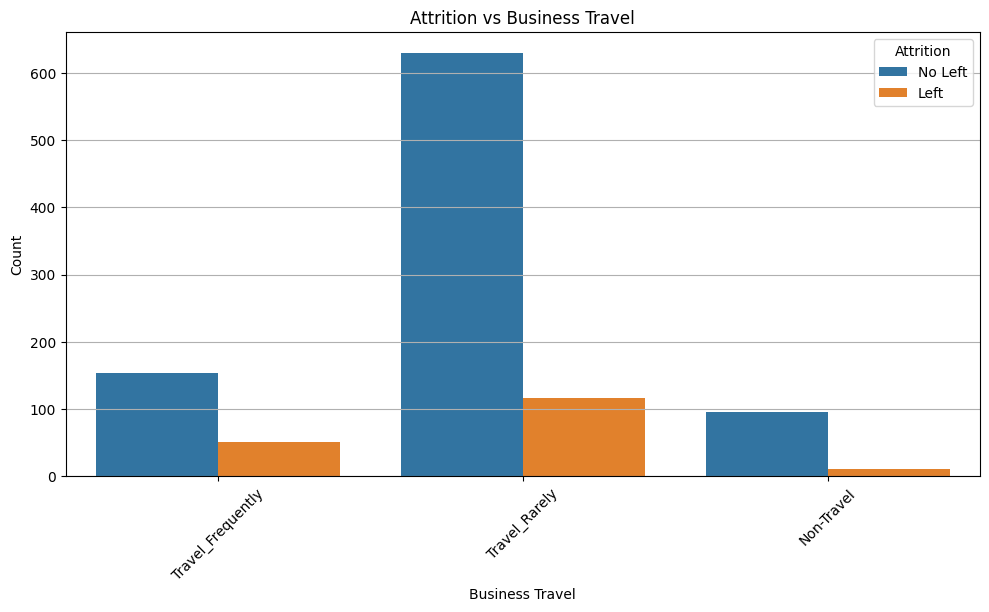

In [57]:
# melihat atrition berdasarkan business travel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition' )
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
plt.show()

- Insight :
jumlah karyawan yang jarang melakukan perjalanan bisnis mengalami attrion tinggi

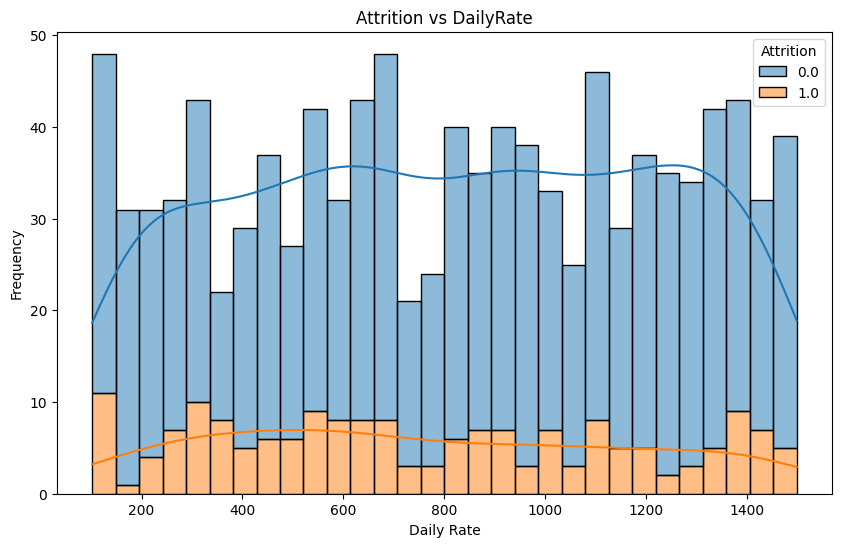

In [ ]:
# melihat attrition berdasarkan DailyRate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DailyRate', hue='Attrition', multiple='stack', kde=True, bins=30)
plt.title('Attrition vs DailyRate')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')
plt.show()

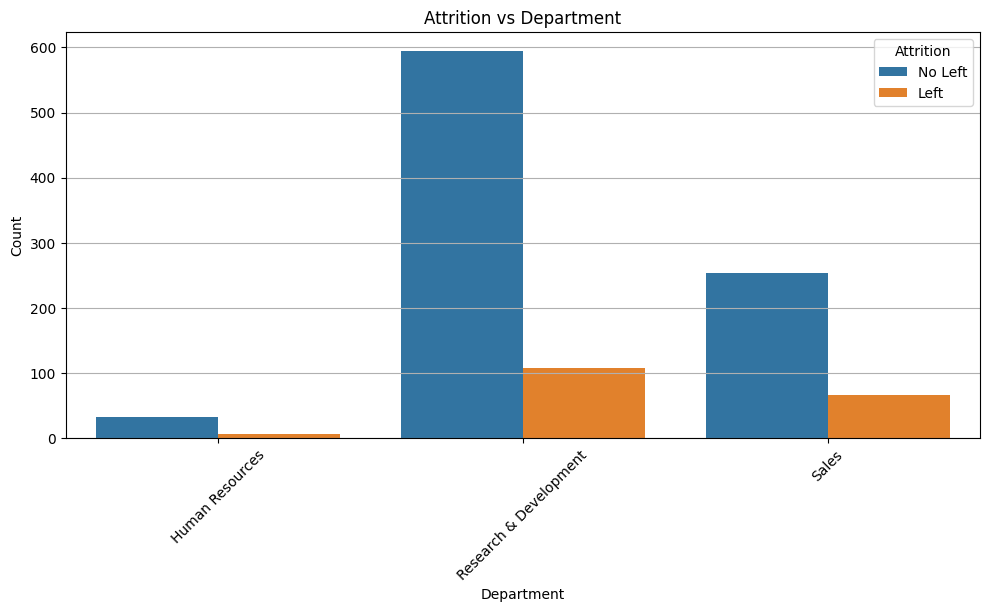

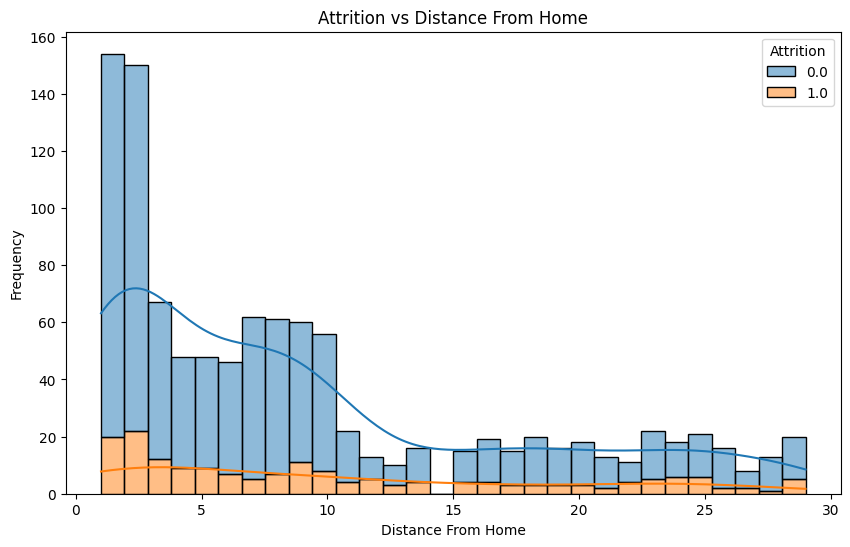

In [59]:
# melihat atrition berdasarkan department
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
plt.show()
# melihat attrition berdasarkan distance from home
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', multiple='stack', kde=True, bins=30)
plt.title('Attrition vs Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Frequency')
plt.show()      

 insght :
 - departemen Research & Development memiliki atrion yang tinggi
 - orang yang bekerja pada jarak terdekat ke kantor memiliki atrion yang tinggi

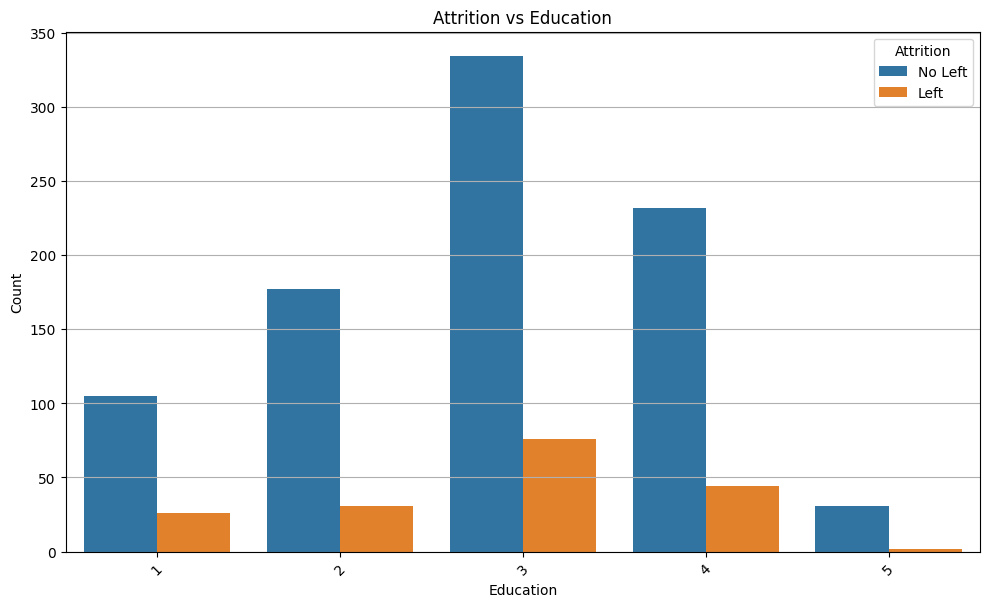

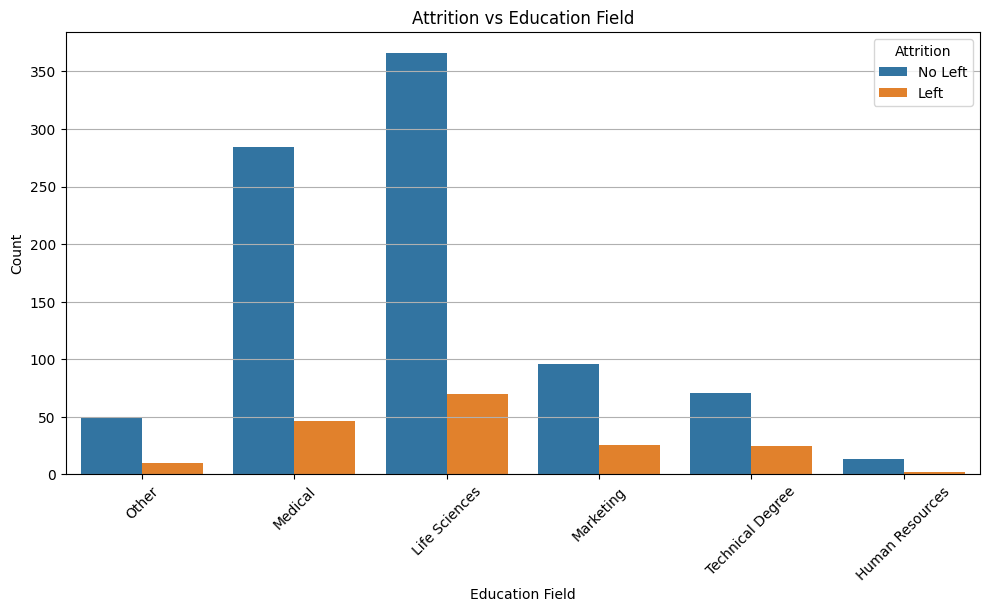

Text(0.5, 1.0, 'Attrition vs Environment Satisfaction')

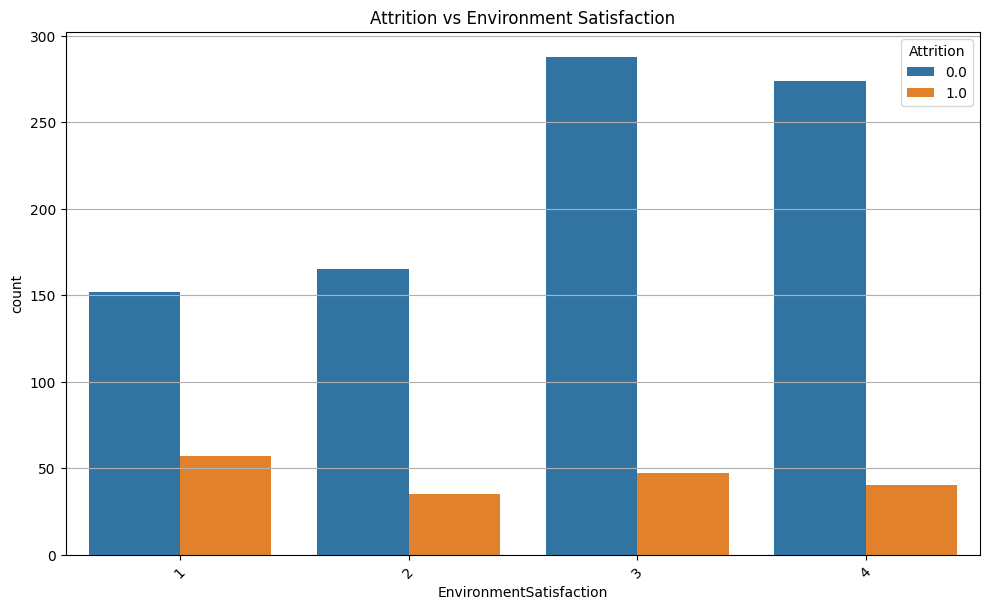

In [60]:
# melihat attrition berdasarkan education
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
plt.show()
# melihat attrition berdasarkan education field
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
plt.show()
# melihat attrition berdasarkan environment satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Environment Satisfaction')      

Insight :
- karyawan yang memiliki gelar sarjana memiliki atrion yang tinggi
- karyawan yang memiliki baground pendidikan Life Sciences	 memiliki atrion yang tinggi 
- karyaawan yang memiliki lingkungan kerja yang buruk memiliki atrion yang tinggi

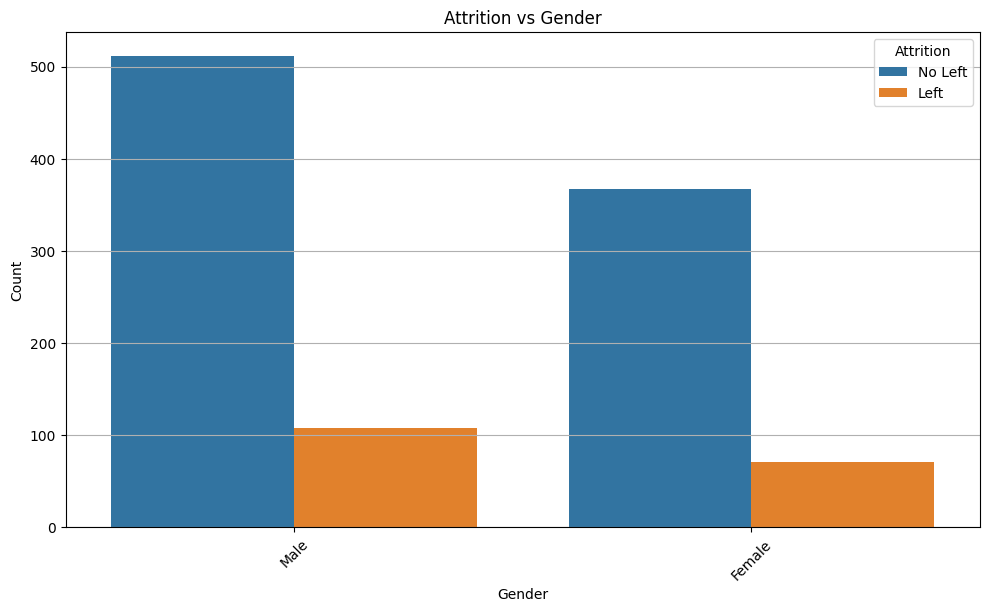

In [61]:
# melihat attrition berdasarkan gender
# Melihat attrition berdasarkan gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
plt.show()

Insight :
 - karyawan laki laki memiliki atrion yang tinggi


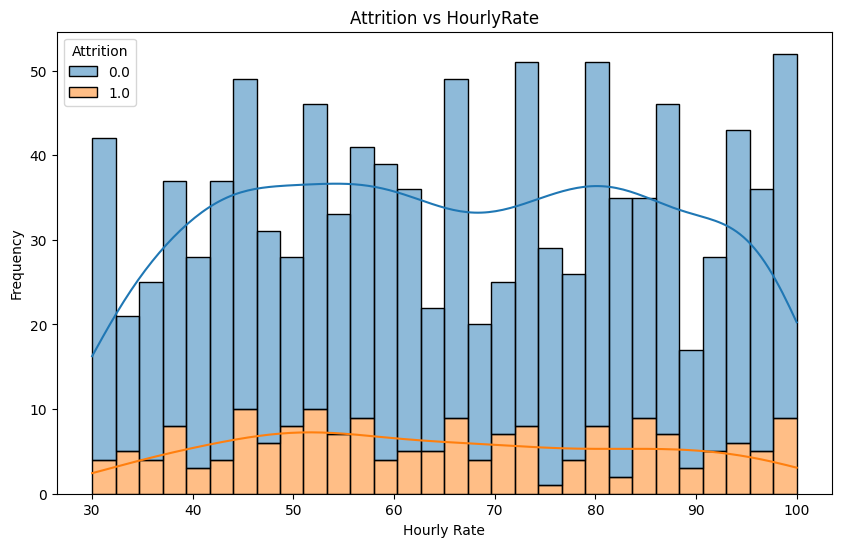

In [62]:
# melihat attrition berdasarkan HourlyRate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HourlyRate', hue='Attrition', multiple='stack', kde=True, bins=30)
plt.title('Attrition vs HourlyRate')
plt.xlabel('Hourly Rate')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Attrition vs Job Involvement')

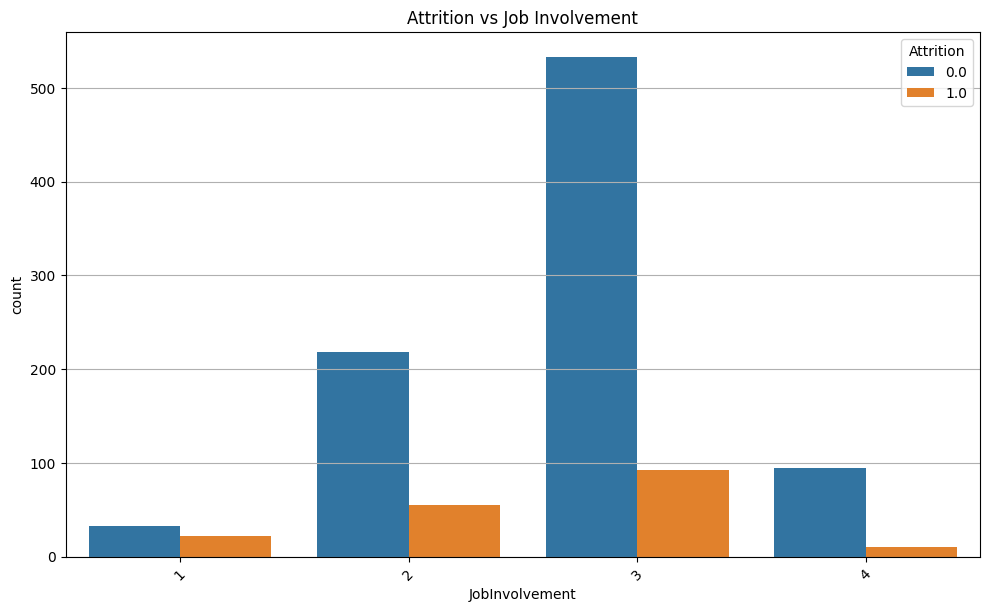

In [63]:
# melihat attrition berdasarkan JobInvolvement
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobInvolvement', hue='Attrition')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.title('Attrition vs Job Involvement')   

Insight :
 - karyawan yang memiliki tingkat keterlibatan terhadap pekerjaan high sangat tinggi atrionya

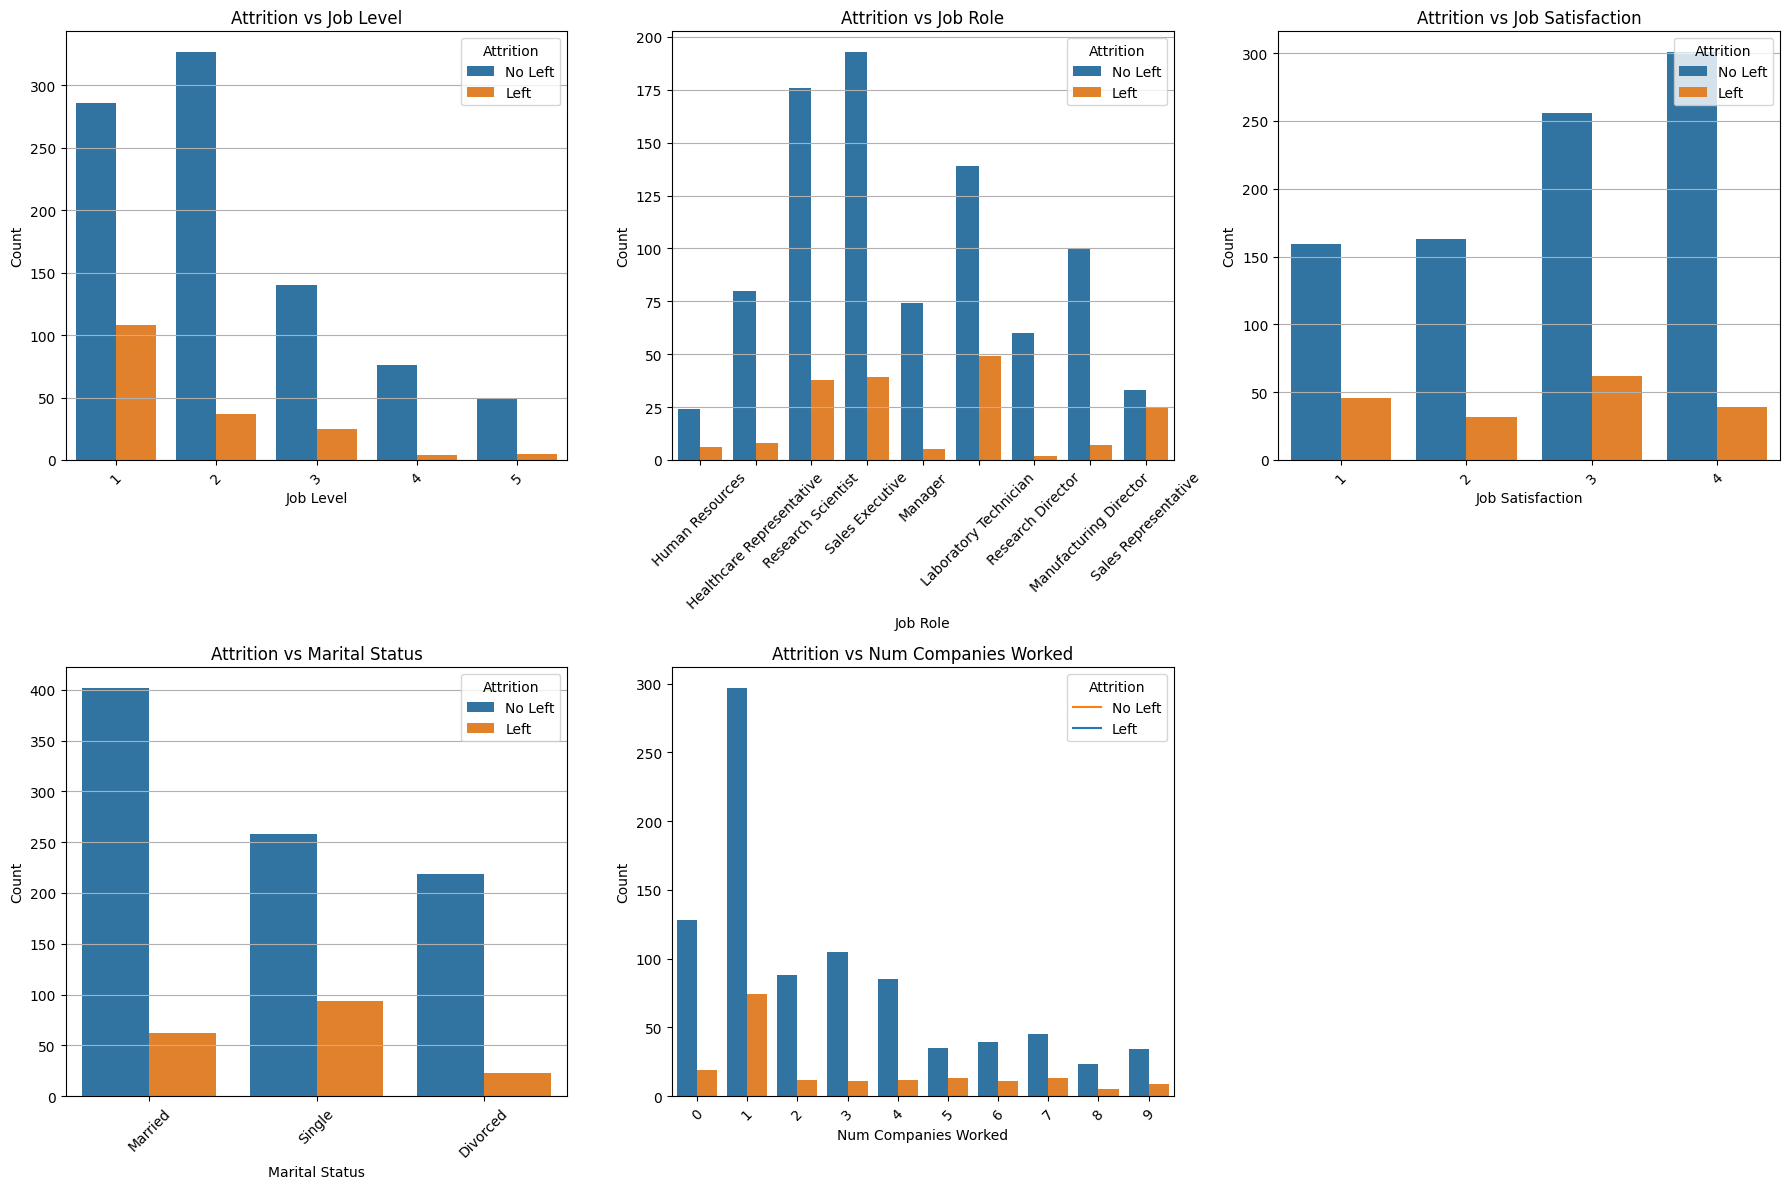

In [71]:
# Membuat figure dan axes untuk 6 subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Ukuran figure disesuaikan

# Melihat attrition berdasarkan job role
sns.countplot(data=df, x='JobRole', hue='Attrition', ax=axes[0, 1])
axes[0, 1].set_title('Attrition vs Job Role')       
axes[0, 1].set_xlabel('Job Role')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
axes[0, 1].grid(axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Melihat attrition berdasarkan job level
sns.countplot(data=df, x='JobLevel', hue='Attrition', ax=axes[0, 0])
axes[0, 0].set_title('Attrition vs Job Level')
axes[0, 0].set_xlabel('Job Level')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
axes[0, 0].grid(axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Melihat attrition berdasarkan job satisfaction
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', ax=axes[0, 2])
axes[0, 2].set_title('Attrition vs Job Satisfaction')
axes[0, 2].set_xlabel('Job Satisfaction')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
axes[0, 2].grid(axis='y')
axes[0, 2].tick_params(axis='x', rotation=45)

# Melihat attrition berdasarkan marital status
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', ax=axes[1, 0])
axes[1, 0].set_title('Attrition vs Marital Status')
axes[1, 0].set_xlabel('Marital Status')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
axes[1, 0].grid(axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Melihat attrition berdasarkan mothly income
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Attrition vs Monthly Income')
axes[1, 1].set_xlabel('Monthly Income')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
axes[1, 1].grid(axis='y')

# Melihat attrition berdasarkan num companies worked
sns.countplot(data=df, x='NumCompaniesWorked', hue='Attrition', ax=axes[1, 1])
axes[1, 1].set_title('Attrition vs Num Companies Worked')
axes[1, 1].set_xlabel('Num Companies Worked')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Attrition', loc='upper right', labels=['No Left', 'Left'])
axes[1, 1].grid(axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

# Melihat attrition berdasarkan PercentSalaryHike

# Menghapus subplot yang tidak digunakan
fig.delaxes(axes[1, 2])  # Menghapus subplot kosong

# Menyesuaikan layout
plt.tight_layout()
plt.show()


- insght
1. Attrition vs Job Level:

Level Pekerjaan Rendah Cenderung Lebih Tinggi Tingkat Keluar: Terlihat bahwa karyawan dengan level pekerjaan 1 dan 2 memiliki jumlah yang keluar lebih tinggi dibandingkan dengan yang tetap bertahan.
Level Pekerjaan Tinggi Relatif Lebih Stabil: Semakin tinggi level pekerjaan (3, 4, 5), proporsi karyawan yang keluar cenderung lebih rendah dibandingkan dengan yang tetap.
Insight: Karyawan pada level pekerjaan yang lebih rendah mungkin merasa kurang memiliki prospek atau kepuasan kerja dibandingkan dengan mereka yang berada di level lebih tinggi. Perusahaan mungkin perlu fokus pada pengembangan karir dan retensi untuk karyawan di level awal.
2. Attrition vs Job Role:

Sales Representative dan Laboratory Technician Tingkat Keluar Tinggi: Peran pekerjaan Sales Representative dan Laboratory Technician menunjukkan jumlah karyawan yang keluar lebih banyak dibandingkan dengan yang bertahan.
Peran Manajerial dan Riset Cenderung Lebih Stabil: Peran seperti Manager, Research Director, dan Healthcare Representative memiliki tingkat keluar yang relatif rendah.
Insight: Ada kemungkinan bahwa peran Sales Representative dan Laboratory Technician memiliki tantangan atau tekanan tertentu yang menyebabkan tingkat turnover lebih tinggi. Perusahaan perlu memahami faktor-faktor spesifik dalam peran ini yang berkontribusi pada attrition.
3. Attrition vs Job Satisfaction:

Kepuasan Kerja Rendah Berkorelasi dengan Tingkat Keluar Tinggi: Karyawan dengan tingkat kepuasan kerja 1 (sangat rendah) dan 2 (rendah) menunjukkan jumlah yang keluar lebih tinggi dibandingkan dengan yang bertahan.
Kepuasan Kerja Tinggi Berkorelasi dengan Tingkat Keluar Rendah: Sebaliknya, karyawan dengan tingkat kepuasan kerja 3 (sedang) dan 4 (tinggi) memiliki proporsi yang lebih besar untuk tetap bertahan.
Insight: Ini menegaskan bahwa kepuasan kerja memainkan peran penting dalam retensi karyawan. Perusahaan perlu berinvestasi dalam meningkatkan kepuasan kerja karyawan untuk mengurangi attrition.
4. Attrition vs Marital Status:

Karyawan Single Lebih Tinggi Tingkat Keluarnya: Karyawan dengan status pernikahan Single memiliki jumlah yang keluar jauh lebih tinggi dibandingkan dengan yang Married atau Divorced.
Karyawan Menikah Cenderung Lebih Stabil: Karyawan dengan status Married menunjukkan tingkat keluar yang paling rendah.
Insight: Faktor-faktor seperti fleksibilitas kerja, dukungan keluarga, atau prioritas hidup yang berbeda mungkin mempengaruhi keputusan karyawan Single untuk keluar dari perusahaan.
5. Attrition vs Num Companies Worked:

Jumlah Perusahaan Sebelumnya Sedikit, Tingkat Keluar Tinggi: Karyawan yang hanya pernah bekerja di 1 atau 2 perusahaan sebelumnya memiliki tingkat keluar yang relatif tinggi.
Pengalaman Kerja Lebih Banyak, Tingkat Keluar Lebih Rendah: Karyawan yang telah bekerja di lebih banyak perusahaan cenderung memiliki tingkat keluar yang lebih rendah. Namun, perlu diperhatikan bahwa jumlah sampel untuk karyawan dengan pengalaman kerja yang sangat banyak mungkin lebih sedikit.
Insight: Karyawan dengan pengalaman kerja yang lebih sedikit mungkin masih mencari kecocokan karir atau lebih mudah tergoda dengan peluang di luar. Perusahaan mungkin perlu memberikan dukungan dan pengembangan yang lebih intensif untuk karyawan baru.

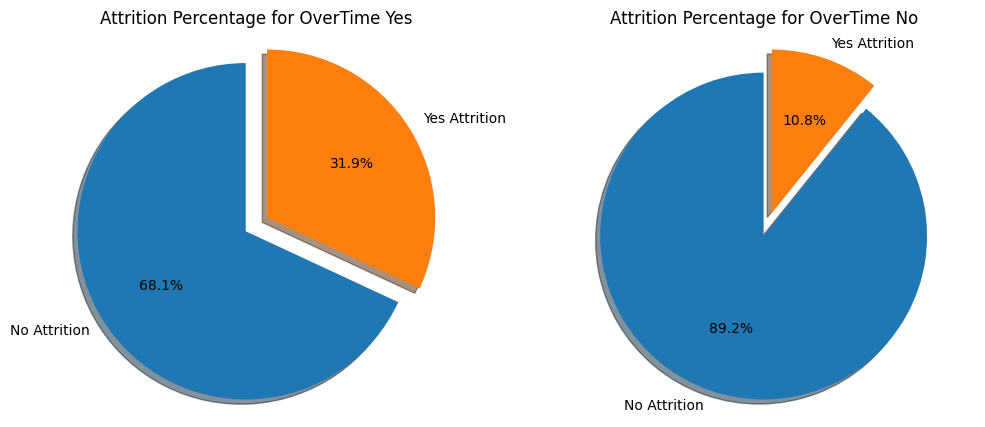

In [72]:

# Menghitung persentase
attrition_overtime = df.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')
total_counts = df.groupby(['OverTime']).size().reset_index(name='Total')
attrition_overtime = attrition_overtime.merge(total_counts, on='OverTime')
attrition_overtime['Percentage'] = (attrition_overtime['Count'] / attrition_overtime['Total']) * 100

# Pie chart for OverTime Yes
overtime_yes = attrition_overtime[attrition_overtime['OverTime'] == 'Yes']
# labels_yes = overtime_yes['Attrition']
sizes_yes = overtime_yes['Percentage']
explode_yes = (0.15, 0)  # explode 1st slice for better visualization

# Pie chart for OverTime No
overtime_no = attrition_overtime[attrition_overtime['OverTime'] == 'No']
# labels_no = overtime_no['Attrition']
sizes_no = overtime_no['Percentage']
explode_no = (0.15, 0)  # explode 1st slice for better visualization

# Creating the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the pie chart for OverTime Yes
ax1.pie(sizes_yes, explode=explode_yes, labels=['No Attrition','Yes Attrition'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Attrition Percentage for OverTime Yes')

# Plotting the pie chart for OverTime No
ax2.pie(sizes_no, explode=explode_no, labels=['No Attrition','Yes Attrition'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Attrition Percentage for OverTime No')

# Display the plots
plt.show()

Insight :

- 31.9% karyawan mengalami attrition (keluar dari perusahaan).
- 68.1% karyawan tidak mengalami attrition (tetap bekerja).
- Untuk Karyawan yang Tidak Bekerja Lembur ("OverTime No"):

- 10.8% karyawan mengalami attrition.
- 89.2% karyawan tidak mengalami attrition.

Terlihat jelas bahwa tingkat attrition jauh lebih tinggi di antara karyawan yang bekerja lembur. Lebih dari tiga kali lipat proporsi karyawan yang keluar dari perusahaan berasal dari kelompok yang sering melakukan lembur dibandingkan dengan kelompok yang tidak.

In [73]:
# Fungsi untuk menghitung persentase attrition
def calculate_attrition_percentage(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    total_counts = attrition_counts.sum(axis=1)
    attrition_percentage = (attrition_counts.T / total_counts).T * 100
    return attrition_percentage

# Hitung persentase attrition untuk setiap kolom yang diminta
columns_to_analyze = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
attrition_percentages = {col: calculate_attrition_percentage(df, col) for col in columns_to_analyze}

# Tampilkan hasil persentase attrition 0 dan 1
for col, percentages in attrition_percentages.items():
    print(f"\nPersentase Attrition untuk {col}:\n{percentages}\n")


Persentase Attrition untuk Department:
Attrition                     0.0        1.0
Department                                  
Human Resources         84.210526  15.789474
Research & Development  84.736091  15.263909
Sales                   79.310345  20.689655


Persentase Attrition untuk EducationField:
Attrition               0.0        1.0
EducationField                        
Human Resources   86.666667  13.333333
Life Sciences     83.944954  16.055046
Marketing         78.688525  21.311475
Medical           86.060606  13.939394
Other             83.050847  16.949153
Technical Degree  73.958333  26.041667


Persentase Attrition untuk Gender:
Attrition        0.0        1.0
Gender                         
Female     83.789954  16.210046
Male       82.580645  17.419355


Persentase Attrition untuk JobRole:
Attrition                        0.0        1.0
JobRole                                        
Healthcare Representative  90.909091   9.090909
Human Resources            80.0

# Data Preparation / Preprocessing

In [74]:
# melihat duplikasi data
df.duplicated().sum()

np.int64(0)

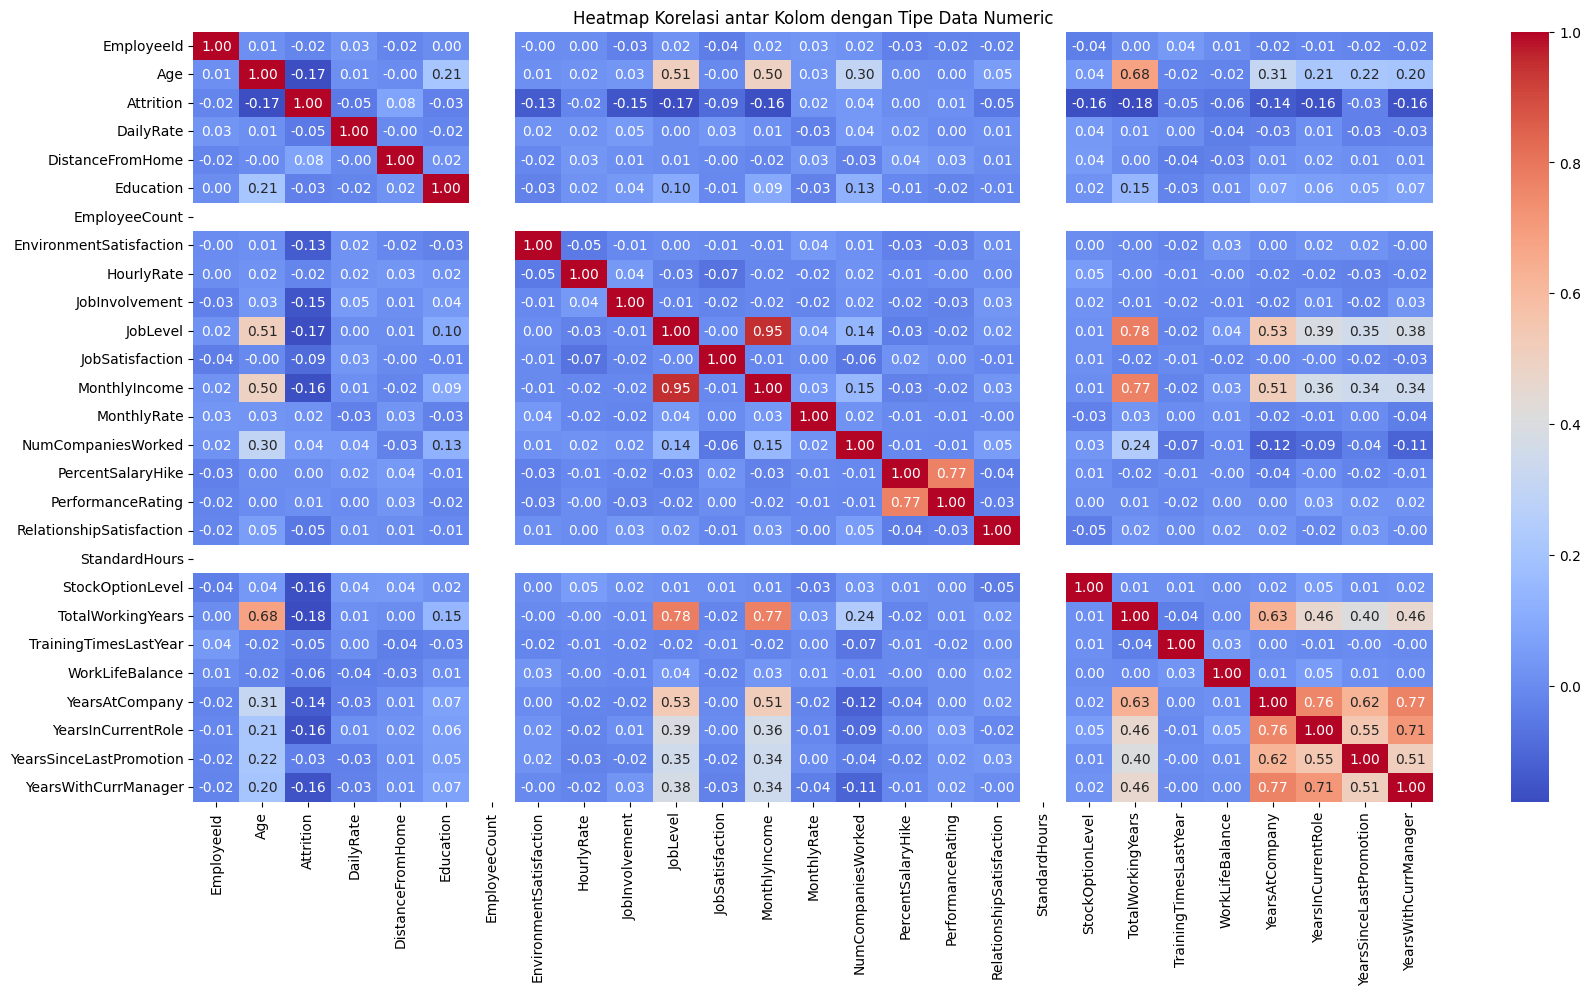

In [76]:
# membuat heat map untuk melihat korelasi antar kolom
float_columns = df.select_dtypes(include=['float','int'])

# Membuat heatmap
plt.figure(figsize=(20,10))
sns.heatmap(float_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Kolom dengan Tipe Data Numeric')
plt.show()

- Insight :
 kolom EmployeeId,EmployeeCount,Gender, Over18, StandardHours,JobLevel,TotalWorkingYears,YearsWithCurrManager,YearsSinceLastPromotion,PerformanceRating,YearsAtCompany,MonthlyRate,DailyRate,HourlyRate memilki korelasi <5 jadi kita drop

In [157]:
# drop kolom yang tidak diperlukan dan kolom yang memiliki correlation > 0.5
df.drop(columns=['EmployeeId','EmployeeCount','Gender', 'Over18', 'StandardHours','JobLevel','TotalWorkingYears','YearsWithCurrManager','YearsSinceLastPromotion','PerformanceRating','YearsAtCompany','MonthlyRate','DailyRate','HourlyRate'], inplace=True)
     

In [158]:
# Mengonversi kolom 'Attrition' menjadi numerik
df['Attrition'] = df['Attrition'].map({'No Left': 0, 'Left': 1})


In [159]:
# Handling Missing Value

# Separate rows with and without missing values in the 'Attrition' column
# Data kosong selanjutnya akan digunakan untuk testing model machine learning.
df_test = df[df['Attrition'].isnull()].reset_index().drop('index',axis=1)
df_train = df[df['Attrition'].notnull()].reset_index().drop('index',axis=1)

print("Total Data Testing =", df_test.shape[0])
print("Total Data Training =", df_train.shape[0])

Total Data Testing = 1470
Total Data Training = 0


# Modeling